In [23]:
import sys
sys.path.append("..")

In [24]:
import os
import numpy as np
import pandas as pd
import spotlob
import tifffile as tf
import matplotlib.pyplot as plt
import imageio as im

In [25]:
from spotlob.process_steps import Reader
from spotlob.parameters import NumericRangeParameter

In [26]:
class TifReader(Reader):
    """
    Reads an image from a file as an RGB file.
    Only image format `tif` is supported.
    It uses `tifffile.memmap`.
    """

    def __init__(self, filepath, xpix, ypix):
        # TODO: xpix and ypix aus Metadaten einlesen
        pars = [NumericRangeParameter("width", xpix, 0, xpix), 
                NumericRangeParameter("height", ypix, 0, ypix)]
        super(TifReader, self).__init__(self.partial_read, pars)
       

    def partial_read(self, filepath, width, height, startingpoint= (0, 0)):
        if os.path.exists(filepath):
            return tf.memmap(filepath, dtype= np.uint8)[startingpoint[1]: startingpoint[1] + height,\
                                     startingpoint[0]: startingpoint[0] + width, :]
        else:
            raise IOError(f"File {filepath} not found")

In [27]:
h = TifReader("testtif.tif", 1000, 1000)

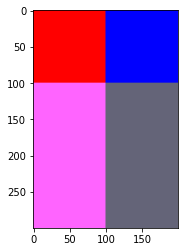

In [28]:
array = h.partial_read("testtif.tif", 200, 300, (400, 400))
plt.imshow(array)